32
0 0.28305902965919694
1 0.027897350735759337
2 -0.24360621789440703
3 -0.37240856796044514
4 -0.283059029659197
5 -0.02789735073575932
6 0.243606217894407
7 0.3724085679604451
8 0.283059029659197
9 0.02789735073575936
10 -0.24360621789440695
11 -0.372408567960445
12 -0.28305902965919694
13 -0.02789735073575937
14 0.24360621789440703
15 0.372408567960445
7
0.655467597619642
0.008996384508700762
15.999999999999993
nan
-0.6972184273960649


C:\Users\Tony_\AppData\Local\Temp\ipykernel_11704\1411572351.py:43: RuntimeWarning: invalid value encountered in arccos
  print(np.arccos(cos_val))


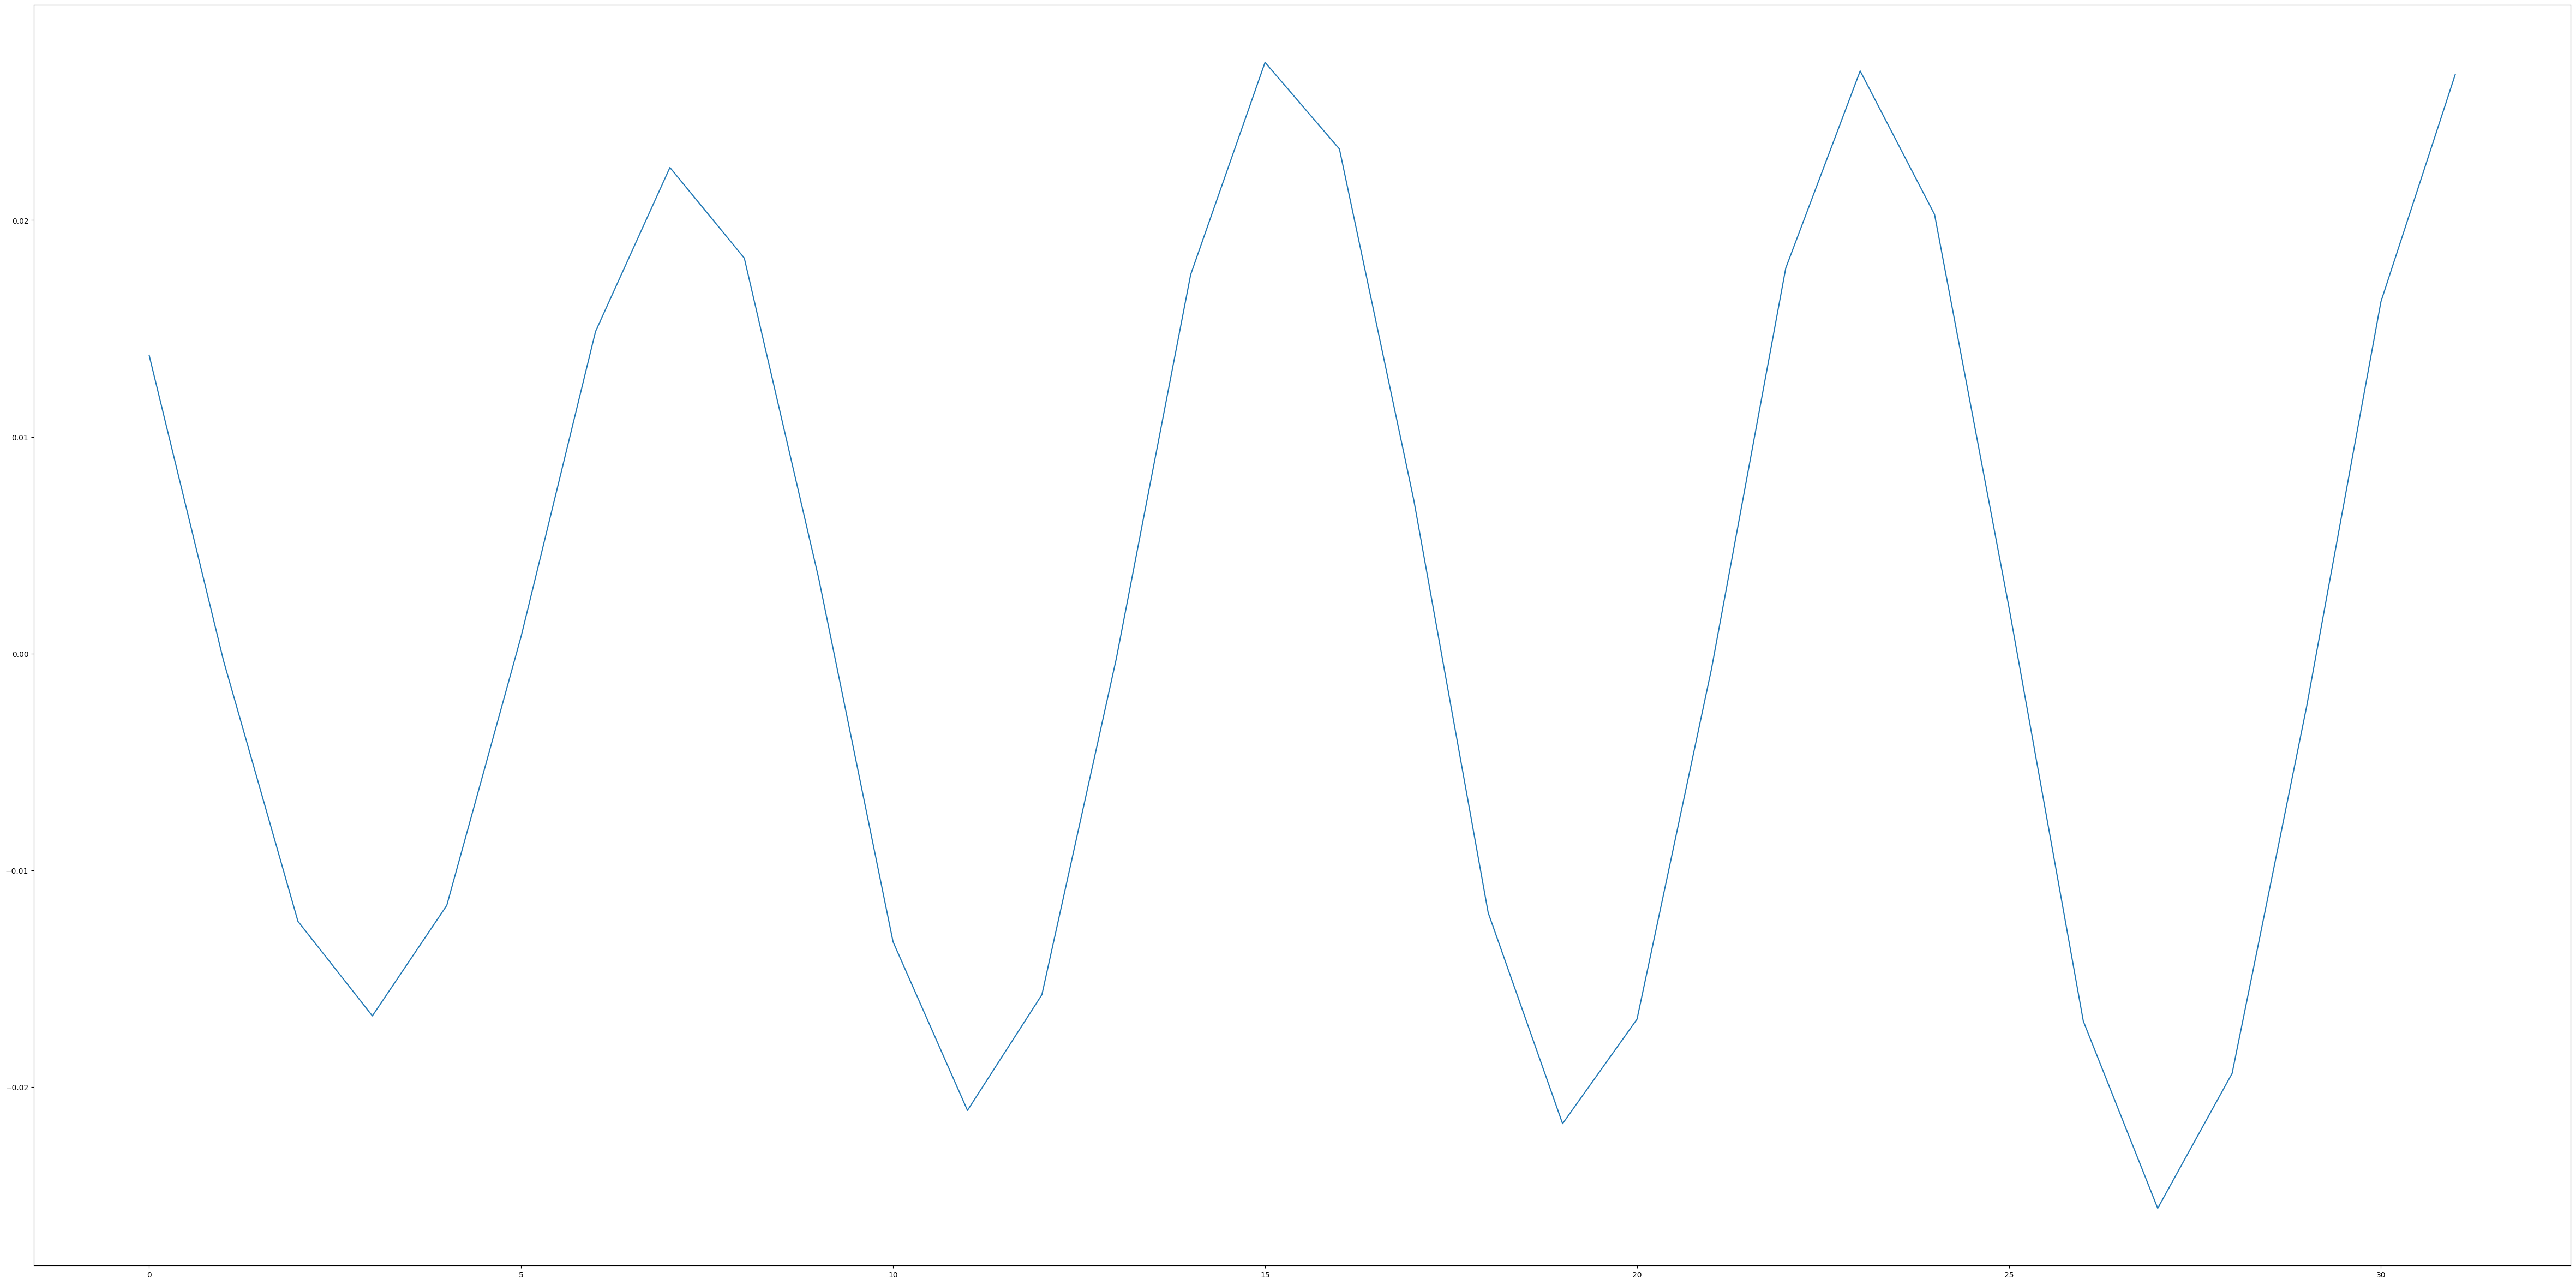

In [10]:
import numpy as np
import matplotlib.pyplot as plt

a=[
    0.0137634, -0.000335693, -0.0123596, -0.0167236, -0.0116272, 0.000793457, 0.0148621, 0.0224304, 0.0182495, 0.003479, -0.0133057, -0.0210876, -0.0157471, -0.000244141, 0.0174866, 0.0272827, 0.0232849, 0.00708008, -0.0119629, -0.021698, -0.0168762, -0.000732422, 0.0177917, 0.026886, 0.0202637, 0.00213623, -0.0169678, -0.0256042, -0.0193787, -0.00247192, 0.0162354, 0.0267334, 0.0237732, 0.0100403, -0.006073, -0.0154419, -0.0136108, -0.00274658, 0.0106201, 0.018158, 0.0149841, 0.00247192, -0.0125122, -0.0205688, -0.0168152, -0.00344849, 0.01297, 0.0229797, 
    ]
a = a[:32]
plt.figure(figsize=(60,30))
plt.plot(a)


t = np.arange(0,32)/48000
print(len(t))
ref= np.cos(2*np.pi*6000*t)
axis = np.sin(2*np.pi*6000*t)

sum=0
auto_a=np.dot(a,a)

max_val = 0
max_offset = 0
for i in range(len(a)//2):
    sum=0
    for j in range(len(a)):
        sum += ref[j]*a[(i+j)%32]
    print(i,sum)
    if sum > max_val:
        max_val = sum
        max_offset = i

print(max_offset)

auto_ref=0
for i in range(len(t)):
    sum+=a[i]*ref[i]
    auto_ref += ref[i]**2

print(sum)
print(auto_a)
print(auto_ref)

cos_val = sum/np.sqrt(auto_a*auto_ref)
print(np.arccos(cos_val))

for i in range(len(t)):
    a[i] *= np.sqrt(auto_ref/auto_a)

aaa = np.concatenate([a,a,a])

# for i in range(16):
#     max_offset=i
#     print("---------------",i)
#     plt.figure(figsize=(20,10))    
#     plt.plot(aaa[max_offset:max_offset+32])
#     plt.plot(ref)
#     plt.show()


sum=0
auto_a=0
auto_ref=0
for i in range(len(t)):
    sum+=axis[i]*(a[i]-ref[i])
    auto_a+=a[i]**2
    auto_ref += ref[i]**2

sin_val = sum/np.sqrt(auto_a*auto_ref)
print(np.arcsin(sin_val))


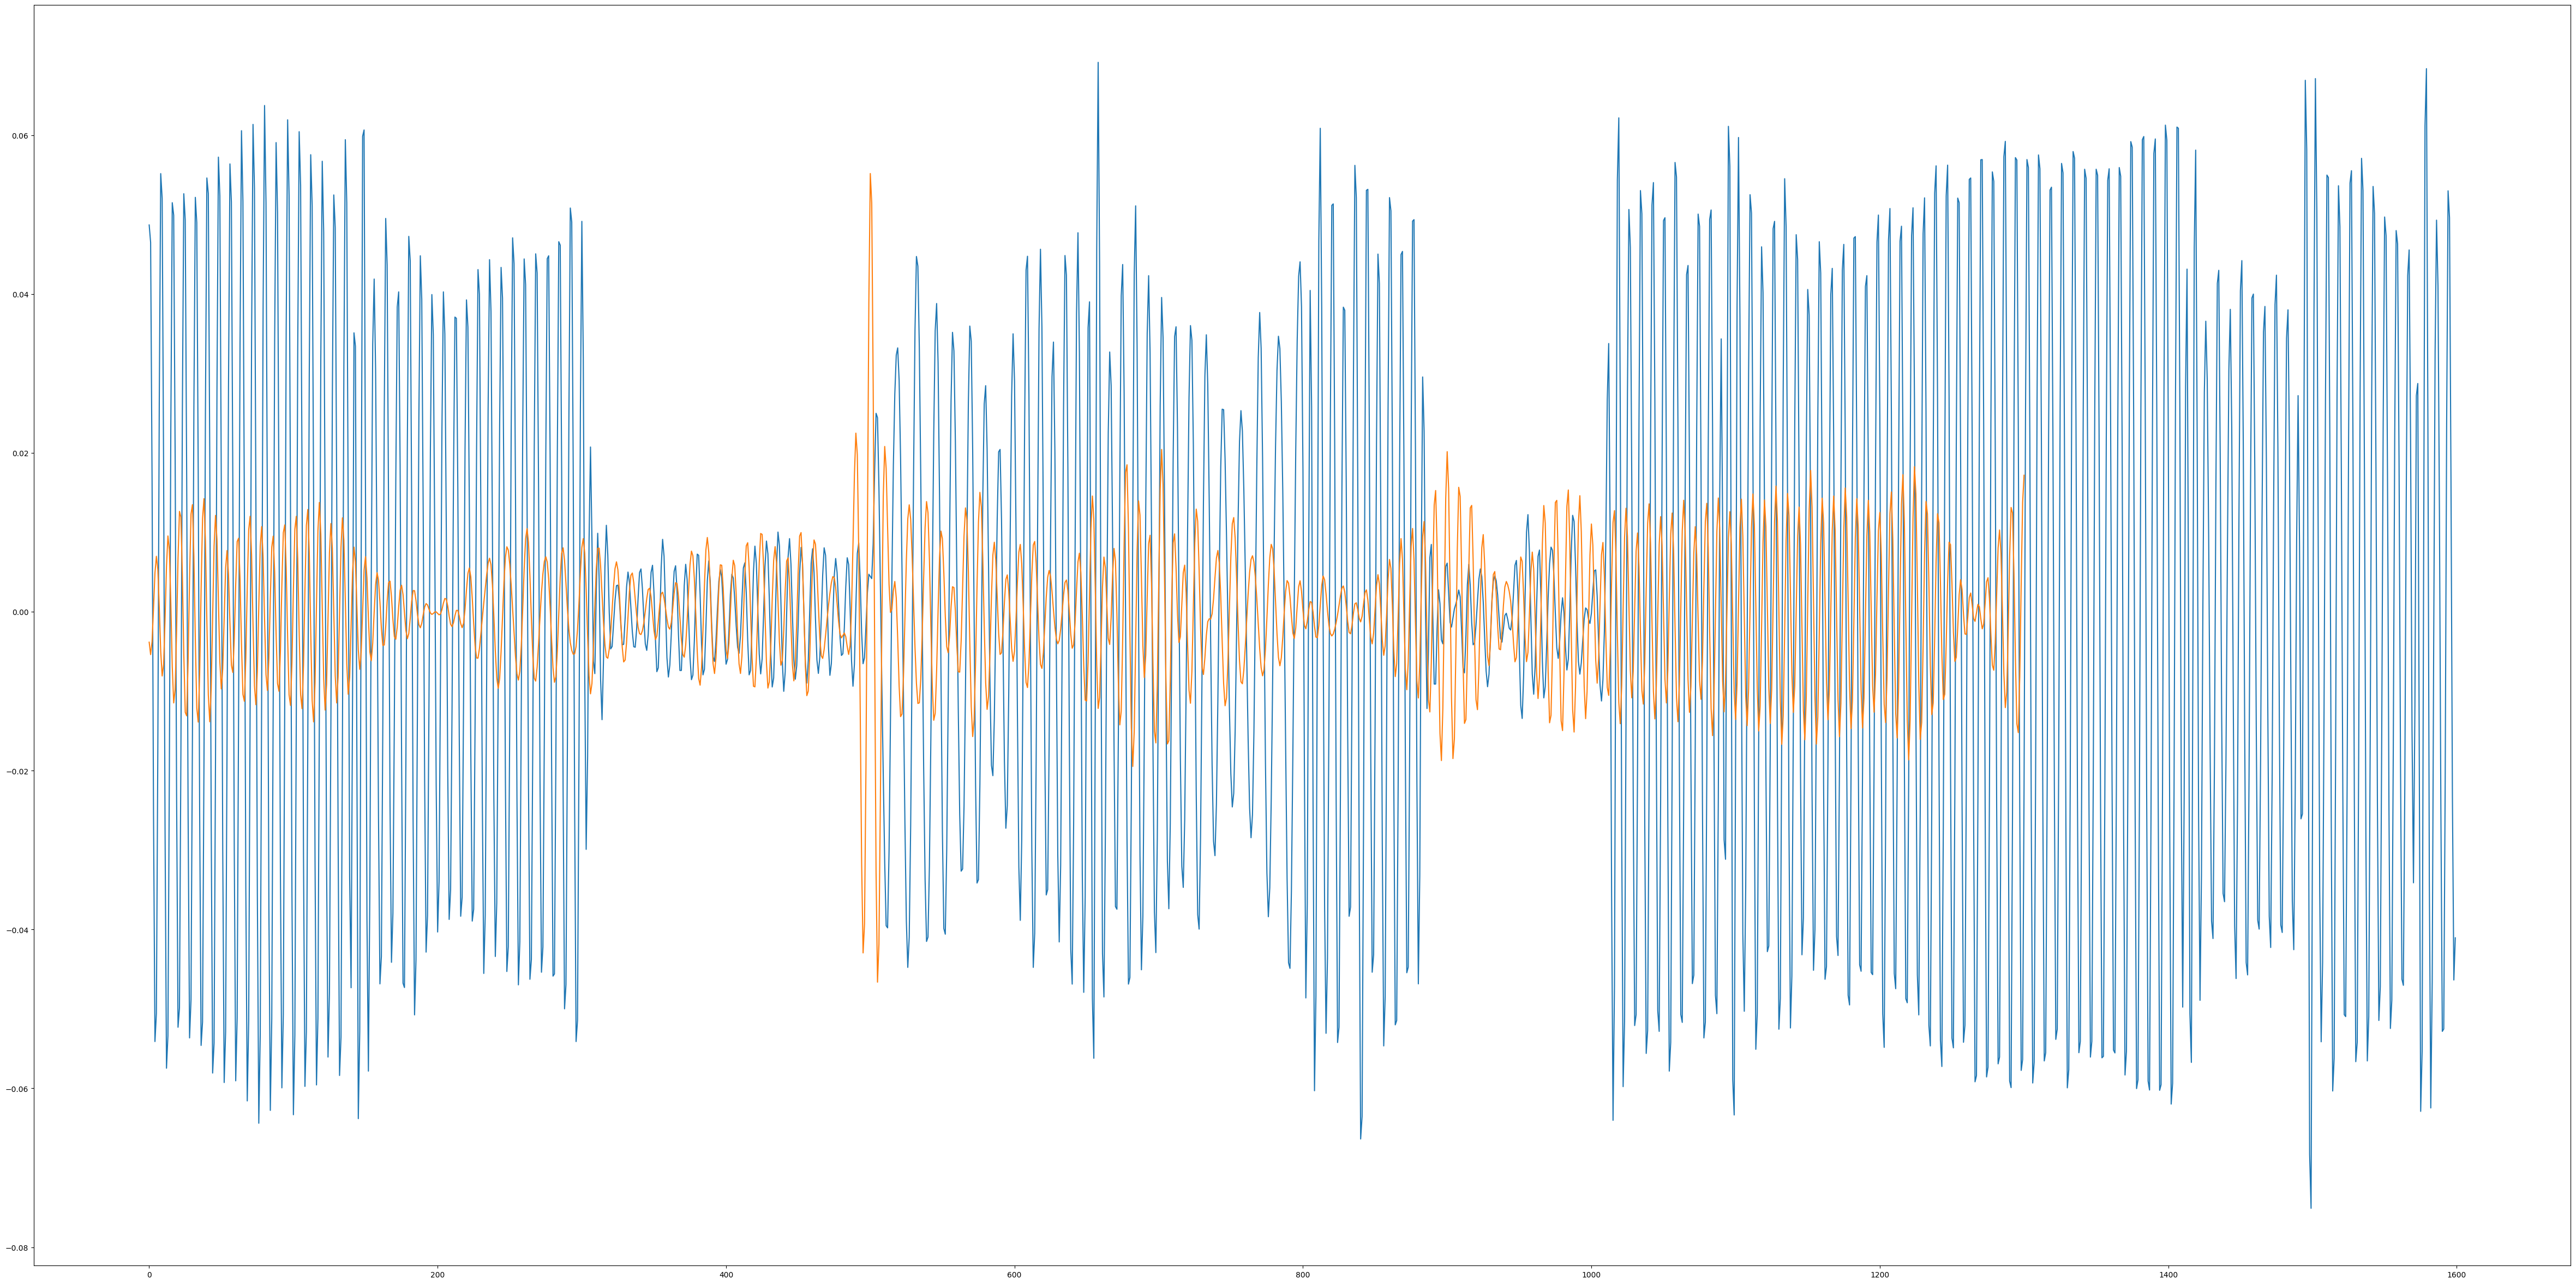

In [56]:
mixed_samples = [
0.0487061, 0.0465088, 0.0167542, -0.0251465, -0.0541077, -0.0505676, -0.0170593, 0.0263672, 0.0551758, 0.0520325, 0.01828, -0.0272522, -0.0574646, -0.0533752, -0.0196533, 0.0230408, 0.0515137, 0.0499268, 0.0196838, -0.0227661, -0.0523071, -0.0498962, -0.0175781, 0.0248413, 0.0526428, 0.0493469, 0.0169678, -0.0258179, -0.0536499, -0.0488586, -0.0154419, 0.0257568, 0.0521851, 0.0490112, 0.0177307, -0.0251465, -0.0545959, -0.0516357, -0.0185242, 0.0250854, 0.0546265, 0.0526733, 0.0195923, -0.0265198, -0.058075, -0.0542908, -0.0181885, 0.0278931, 0.057251, 0.0523682, 0.0164185, -0.0299377, -0.0592651, -0.052887, -0.0162354, 0.0283813, 0.0563965, 0.0515747, 0.0162659, -0.0300293, -0.0590515, -0.0511475, -0.0122681, 0.033783, 0.0605774, 0.0516663, 0.0123901, -0.034668, -0.0615845, -0.0515137, -0.0117188, 0.0343018, 0.0613708, 0.0532837, 0.0137024, -0.0355225, -0.0643921, -0.0532532, -0.0098877, 0.0384827, 0.0637512, 0.0515137, 0.00997925, -0.0371399, -0.0627747, -0.0512085, -0.0108337, 0.0340576, 0.059082, 0.0502625, 0.0126038, -0.0328979, -0.0599365, -0.0507202, -0.0108337, 0.035553, 0.0619507, 0.0524292, 0.0123596, -0.035614, -0.063324, -0.0533142, -0.0132141, 0.0329895, 0.0604553, 0.0537109, 0.016449, -0.0305481, -0.0597534, -0.0528564, -0.0153809, 0.0299683, 0.0575562, 0.0510864, 0.0144958, -0.0314636, -0.0595703, -0.051178, -0.0126343, 0.0317993, 0.0567322, 0.04776, 0.0112, -0.0315552, -0.0560608, -0.0479736, -0.0136719, 0.026947, 0.0524902, 0.0483704, 0.0158386, -0.0283508, -0.0583801, -0.0535583, -0.0162048, 0.0309448, 0.0594482, 0.0514832, 0.0121155, -0.0334167, -0.0473328, -0.0110779, 0.0351257, 0.0334473, -0.0178223, -0.0638123, -0.0528259, 0.00720215, 0.0598755, 0.0606689, 0.0141296, -0.0387268, -0.0578308, -0.0351257, 0.00442505, 0.0336914, 0.0419006, 0.030426, 0.0050354, -0.0257874, -0.0468445, -0.043396, -0.0140686, 0.0251465, 0.04953, 0.0436707, 0.0122375, -0.0243835, -0.0441284, -0.0379333, -0.0131836, 0.0166931, 0.0383911, 0.0402832, 0.0184937, -0.0178528, -0.0467529, -0.0473022, -0.0188293, 0.0207214, 0.0472717, 0.0441895, 0.0135803, -0.0262756, -0.0507507, -0.0438538, -0.0118713, 0.0243835, 0.0448303, 0.0393677, 0.0125122, -0.0213623, -0.0428467, -0.038208, -0.0115051, 0.0206299, 0.0399475, 0.0348816, 0.00927734, -0.0217896, -0.0403137, -0.0339661, -0.00735474, 0.0230713, 0.0402832, 0.0350037, 0.0107117, -0.0196533, -0.0387268, -0.0350037, -0.012085, 0.0168762, 0.0371094, 0.0369568, 0.015686, -0.0157166, -0.0383301, -0.0359192, -0.0107727, 0.0204163, 0.0392761, 0.0358582, 0.013031, -0.0175476, -0.0389404, -0.0374451, -0.0131531, 0.0202942, 0.0430908, 0.039978, 0.0120544, -0.0239868, -0.0455322, -0.0382385, -0.00839233, 0.0253601, 0.044342, 0.0378113, 0.00991821, -0.0236511, -0.043396, -0.0366516, -0.0088501, 0.023468, 0.0433655, 0.0394897, 0.0136719, -0.0212097, -0.0452881, -0.0421753, -0.0137634, 0.0229797, 0.0470886, 0.0438232, 0.0146484, -0.0233154, -0.0469666, -0.0415344, -0.0121765, 0.0226746, 0.0444336, 0.0411987, 0.0144043, -0.0216064, -0.0462646, -0.0437927, -0.0159607, 0.0206909, 0.0450745, 0.0426636, 0.0151978, -0.0213318, -0.0453796, -0.0422058, -0.0152588, 0.0196228, 0.0444641, 0.0448303, 0.0196838, -0.0180054, -0.0458679, -0.0455933, -0.0181274, 0.0197144, 0.0466003, 0.0461731, 0.0178223, -0.0223389, -0.0499878, -0.046936, -0.0161133, 0.0237427, 0.0508423, 0.0490723, 0.0184021, -0.0244751, -0.0541077, -0.0514526, -0.018158, 0.0256042, 0.0491638, 0.0318604, -0.0078125, -0.0299072, -0.018219, 0.00897217, 0.020752, 0.00915527, -0.00622559, -0.00778198, 0.00253296, 0.0098877, 0.00405884, -0.0085144, -0.0135803, -0.00616455, 0.00564575, 0.0108948, 0.00714111, -6.10352e-05, -0.00466919, -0.00436401, -0.00140381, 0.00143433, 0.0032959, 0.00335693, 0.00152588, -0.00152588, -0.00415039, -0.00408936, -0.000854492, 0.00311279, 0.00500488, 0.00369263, 0.000518799, -0.00250244, -0.00439453, -0.00445557, -0.00213623, 0.00170898, 0.00494385, 0.00540161, 0.00289917, -0.00088501, -0.00402832, -0.00485229, -0.00286865, 0.00109863, 0.00497437, 0.00585938, 0.00241089, -0.00335693, -0.00753784, -0.00704956, -0.00149536, 0.00558472, 0.00912476, 0.00698853, 0.000579834, -0.00576782, -0.00820923, -0.00671387, -0.00286865, 0.00167847, 0.00509644, 0.00579834, 0.00268555, -0.00289917, -0.00738525, -0.00738525, -0.00262451, 0.0032959, 0.00598145, 0.00405884, -0.000671387, -0.0057373, -0.00854492, -0.00796509, -0.00369263, 0.00262451, 0.00726318, 0.0071106, 0.00219727, -0.00405884, -0.00793457, -0.00723267, -0.0020752, 0.00390625, 0.00640869, 0.00387573, -0.00149536, -0.00567627, -0.0062561, -0.00366211, 0.000305176, 0.0038147, 0.00534058, 0.00427246, 0.000854492, -0.00357056, -0.0065918, -0.00598145, -0.00228882, 0.00222778, 0.00473022, 0.00424194, 0.00164795, -0.00170898, -0.00445557, -0.00521851, -0.00296021, 0.00143433, 0.00552368, 0.00616455, 0.00238037, -0.00360107, -0.00793457, -0.00738525, -0.0017395, 0.00509644, 0.00827026, 0.00610352, 0.000396729, -0.00531006, -0.0078125, -0.00592041, -0.000427246, 0.0057373, 0.00891113, 0.0072937, 0.0015564, -0.00531006, -0.00946045, -0.0083313, -0.00210571, 0.00567627, 0.0100403, 0.00830078, 0.00146484, -0.0062561, -0.0100098, -0.00756836, -0.000305176, 0.00689697, 0.00921631, 0.00598145, -0.000274658, -0.00604248, -0.00848389, -0.0067749, -0.00149536, 0.00482178, 0.00811768, 0.00610352, -6.10352e-05, -0.00643921, -0.00897217, -0.00616455, 0.000213623, 0.00610352, 0.00793457, 0.00494385, -0.000946045, -0.006073, -0.00775146, -0.00567627, -0.00088501, 0.00463867, 0.00805664, 0.0071106, 0.00201416, -0.00439453, -0.00799561, -0.00653076, -0.00112915, 0.0045166, 0.00671387, 0.00491333, 0.000823975, -0.00317383, -0.00549316, -0.00527954, -0.00201416, 0.00314331, 0.00680542, 0.00595093, 0.000488281, -0.00619507, -0.0093689, -0.0065918, 0.000640869, 0.00735474, 0.00866699, 0.0039978, -0.00262451, -0.00653076, -0.00576782, -0.00180054, 0.00241089, 0.00473022, 0.00445557, 0.00418091, 0.00857544, 0.0176392, 0.0249939, 0.0244446, 0.015625, 0.00314331, -0.00906372, -0.0206299, -0.0315857, -0.0395203, -0.0397949, -0.0302429, -0.0134277, 0.00445557, 0.0184631, 0.0274353, 0.0323181, 0.0332336, 0.0291138, 0.0193481, 0.00518799, -0.0109253, -0.0265198, -0.0389099, -0.0447693, -0.0409546, -0.0269165, -0.00567627, 0.0171814, 0.0354919, 0.0447388, 0.0435181, 0.0332336, 0.0169983, -0.00161743, -0.0195618, -0.0337219, -0.0415039, -0.0409546, -0.0319214, -0.0159302, 0.00384521, 0.0224915, 0.0353699, 0.0388184, 0.0314026, 0.0145569, -0.00738525, -0.0276794, -0.0398865, -0.0405884, -0.0299683, -0.0114136, 0.00939941, 0.0265808, 0.0351868, 0.0328369, 0.0213928, 0.00485229, -0.0122375, -0.0255127, -0.0326538, -0.0323792, -0.0244751, -0.00979614, 0.00900269, 0.0263062, 0.0359802, 0.0340576, 0.0203247, -0.000823975, -0.0217285, -0.0341492, -0.0337219, -0.0216675, -0.00350952, 0.0143433, 0.0261841, 0.0284729, 0.0205078, 0.00579834, -0.00927734, -0.0193176, -0.0206299, -0.0134583, -0.00109863, 0.0117188, 0.0201416, 0.0204468, 0.0115356, -0.00357056, -0.0187988, -0.0272522, -0.024353, -0.0102539, 0.00961304, 0.0271912, 0.0350037, 0.0290833, 0.0110168, -0.0124817, -0.0321045, -0.0388489, -0.0287476, -0.00491333, 0.0233154, 0.0430298, 0.0447693, 0.0273132, -0.00186157, -0.0299072, -0.0447693, -0.0404663, -0.0190125, 0.010437, 0.035614, 0.0456543, 0.0358582, 0.0108337, -0.0175171, -0.0356445, -0.0349731, -0.0166931, 0.00933838, 0.0296021, 0.0339661, 0.0200806, -0.00564575, -0.0305481, -0.0415649, -0.0318909, -0.00527954, 0.0254822, 0.0448608, 0.0423889, 0.018219, -0.0159607, -0.0424805, -0.046875, -0.0266113, 0.00750732, 0.0375671, 0.0477295, 0.0325623, -6.10352e-05, -0.0329895, -0.0479126, -0.0358582, -0.000823975, 0.0357666, 0.039032, -0.00115967, -0.0486755, -0.0562134, -0.0125122, 0.0456543, 0.0691833, 0.0437317, -0.00582886, -0.0430298, -0.0484924, -0.0279846, 0.000427246, 0.022583, 0.0327148, 0.0285034, 0.00976562, -0.0167847, -0.0371094, -0.0374451, -0.0154724, 0.0162659, 0.0397949, 0.0437317, 0.0275574, -0.000244141, -0.028595, -0.046875, -0.046051, -0.0237427, 0.0116882, 0.0424194, 0.0511169, 0.0333862, 0.000183105, -0.0307312, -0.0450745, -0.0383606, -0.0153503, 0.013092, 0.0350647, 0.0423279, 0.0325623, 0.00997925, -0.0169678, -0.0377808, -0.0429077, -0.0286255, -0.00112915, 0.0259705, 0.0395813, 0.0345459, 0.0144348, -0.0112915, -0.0314026, -0.037384, -0.0266418, -0.0043335, 0.0193481, 0.034668, 0.0358887, 0.0232239, 0.00238037, -0.0184326, -0.0320435, -0.0346985, -0.0262146, -0.00958252, 0.0100708, 0.0269775, 0.0360413, 0.0341797, 0.0210266, -0.000366211, -0.0229187, -0.0381165, -0.0399475, -0.0282593, -0.00799561, 0.0138245, 0.0296936, 0.0348816, 0.0285645, 0.0139465, -0.00378418, -0.0192566, -0.0288696, -0.0307007, -0.0242004, -0.0111389, 0.00476074, 0.01828, 0.0255127, 0.0254517, 0.0192261, 0.00949097, -0.0015564, -0.0121155, -0.0203857, -0.0245667, -0.0228577, -0.0148621, -0.00231934, 0.011261, 0.0214539, 0.0253296, 0.0227661, 0.0154419, 0.00546265, -0.00546265, -0.0162048, -0.0246582, -0.0284424, -0.0255432, -0.0151672, 0.000671387, 0.0180969, 0.0320129, 0.0376892, 0.0331726, 0.0193481, 3.05176e-05, -0.019043, -0.0328369, -0.0383911, -0.034729, -0.0236206, -0.00839233, 0.00753784, 0.0209656, 0.0303955, 0.0346985, 0.0331421, 0.0264587, 0.0153198, 0.000396729, -0.0170593, -0.0335999, -0.0441895, -0.0448914, -0.0350952, -0.0179443, 0.00198364, 0.0203857, 0.0341797, 0.0422363, 0.0440674, 0.0383911, 0.0179443, -0.0197144, -0.0486145, -0.0367737, 0.00778198, 0.0404663, 0.0257874, -0.0241089, -0.0603027, -0.0483398, 0.000213623, 0.0467529, 0.0608826, 0.0382996, -0.00180054, -0.0369873, -0.0530701, -0.0436096, -0.0134277, 0.0241089, 0.051178, 0.0513611, 0.0213318, -0.0231323, -0.0542297, -0.0523071, -0.0220947, 0.0150146, 0.0383606, 0.0379639, 0.0164185, -0.0148926, -0.0383301, -0.0371704, -0.009552, 0.0293274, 0.0562134, 0.052124, 0.0163269, -0.0326233, -0.0663757, -0.0635376, -0.0269775, 0.0206909, 0.0530701, 0.0531921, 0.0233459, -0.0177307, -0.0453796, -0.0431824, -0.0149231, 0.0213928, 0.0450439, 0.0413208, 0.0110474, -0.0290833, -0.054657, -0.0484314, -0.0151672, 0.0252686, 0.0521545, 0.0504761, 0.0205078, -0.021698, -0.052002, -0.0514526, -0.0219116, 0.0175781, 0.0449829, 0.0453796, 0.0195007, -0.0180969, -0.0454407, -0.0447388, -0.0168152, 0.0215149, 0.0491943, 0.0493774, 0.0203552, -0.0214233, -0.0468445, -0.0332031, 0.00506592, 0.0295715, 0.0227356, -0.00012207, -0.0121765, -0.00500488, 0.00683594, 0.00848389, -0.000366211, -0.00909424, -0.00909424, -0.00213623, 0.0027771, 0.0010376, -0.00354004, -0.00402832, 0.000762939, 0.00570679, 0.00613403, 0.00234985, -0.00131226, -0.00192261, -0.000762939, 0.000366211, 0.000976562, 0.00170898, 0.00274658, 0.00189209, -0.00238037, -0.00704956, -0.00769043, -0.00296021, 0.00344849, 0.00598145, 0.0032959, -0.00134277, -0.00415039, -0.00390625, -0.00161743, 0.00134277, 0.00411987, 0.00540161, 0.00442505, 0.00125122, -0.00326538, -0.00744629, -0.00942993, -0.00784302, -0.00332642, 0.00134277, 0.00384521, 0.0045166, 0.00393677, 0.00210571, -0.000732422, -0.00332642, -0.0038147, -0.00216675, -0.000457764, -0.000183105, -0.000976562, -0.00204468, -0.00228882, -0.000854492, 0.00241089, 0.00585938, 0.00646973, 0.00265503, -0.00476074, -0.0117798, -0.0134277, -0.00808716, 0.00161743, 0.0100098, 0.0122375, 0.00765991, -0.000549316, -0.00784302, -0.010376, -0.0067749, 0.000610352, 0.00698853, 0.00778198, 0.00198364, -0.00622559, -0.0108337, -0.00939941, -0.00411987, 0.00177002, 0.00604248, 0.00814819, 0.00775146, 0.00457764, -0.000244141, -0.0045166, -0.00585938, -0.00372314, -0.000213623, 0.00177002, -0.000152588, -0.00436401, -0.00732422, -0.00595093, 3.05176e-05, 0.00741577, 0.012146, 0.0113831, 0.00585938, -0.00112915, -0.0062561, -0.00784302, -0.00640869, -0.00357056, -0.00088501, 0.000488281, 0.000274658, -0.000915527, -0.00146484, -0.000183105, 0.00259399, 0.00515747, 0.00527954, 0.00198364, -0.00387573, -0.00924683, -0.0112305, -0.00854492, -0.00244141, 0.00906372, 0.0267334, 0.033783, 0.00970459, -0.0355225, -0.0640259, -0.0471191, 0.00585938, 0.0544128, 0.0621948, 0.0257568, -0.0272827, -0.0597839, -0.0515747, -0.0136108, 0.0275574, 0.0506592, 0.0458679, 0.0163879, -0.023407, -0.0520935, -0.0507202, -0.0190735, 0.0240479, 0.0530396, 0.0501099, 0.0170898, -0.0266724, -0.055603, -0.0527039, -0.0212708, 0.0204468, 0.0512085, 0.0540466, 0.0266113, -0.0165405, -0.0502014, -0.0528259, -0.0238342, 0.0184021, 0.0492554, 0.0496216, 0.0184326, -0.0265503, -0.0578308, -0.0541992, -0.0185547, 0.0268555, 0.0565796, 0.0547485, 0.0235596, -0.0195312, -0.0507202, -0.0516968, -0.0238647, 0.014679, 0.04245, 0.0436096, 0.0181274, -0.0193787, -0.046814, -0.0457458, -0.0167542, 0.0227051, 0.0500793, 0.0485229, 0.018158, -0.0241394, -0.0536499, -0.0516663, -0.0206909, 0.0203857, 0.049408, 0.0505981, 0.0236511, -0.0169678, -0.0482788, -0.0505981, -0.023407, 0.0151978, 0.0343628, 0.0109863, -0.0286865, -0.0311584, 0.0142212, 0.0611267, 0.0560913, -0.00213623, -0.0589294, -0.0633545, -0.0166016, 0.0384521, 0.0597229, 0.0371094, -0.00613403, -0.0405273, -0.050293, -0.034668, -0.00350952, 0.0302124, 0.0525208, 0.0502014, 0.0197144, -0.0247192, -0.0550842, -0.0505066, -0.0158997, 0.0241394, 0.0459595, 0.0401917, 0.0133667, -0.0198364, -0.0427856, -0.0420837, -0.0170288, 0.0198669, 0.0482483, 0.0491638, 0.02005, -0.0227966, -0.0525513, -0.0486755, -0.0142822, 0.0284424, 0.0545349, 0.0484924, 0.0143127, -0.0274963, -0.0523987, -0.0458679, -0.0141907, 0.0235596, 0.0474854, 0.044342, 0.0162659, -0.0202026, -0.0431824, -0.0385742, -0.0114746, 0.0205383, 0.0405884, 0.0373535, 0.0115662, -0.0227661, -0.0451355, -0.0400085, -0.0108643, 0.0245056, 0.0466003, 0.0426636, 0.014801, -0.021637, -0.0462646, -0.0446777, -0.0194092, 0.0144348, 0.039978, 0.0432434, 0.0215454, -0.0133362, -0.040863, -0.0432739, -0.0195618, 0.0156555, 0.0430298, 0.0462646, 0.0220032, -0.0174255, -0.0482788, -0.0494995, -0.0208435, 0.0190735, 0.0470581, 0.0472412, 0.0209351, -0.0166626, -0.0444641, -0.0452576, -0.02005, 0.0151367, 0.0409546, 0.0423279, 0.018158, -0.0182495, -0.0454102, -0.0456848, -0.0193481, 0.0179443, 0.0465393, 0.0499573, 0.0246582, -0.0167542, -0.0505981, -0.0548401, -0.0271301, 0.014679, 0.0467529, 0.0507812, 0.0250549, -0.0149231, -0.0455322, -0.0474548, -0.0207214, 0.0177612, 0.0466614, 0.0485535, 0.0217285, -0.0186462, -0.0487061, -0.0492249, -0.0210876, 0.018158, 0.0473633, 0.0508728, 0.0267639, -0.0127869, -0.0456848, -0.0507507, -0.0250854, 0.0153503, 0.0476074, 0.052124, 0.0252686, -0.0180359, -0.052063, -0.054657, -0.0246582, 0.0193176, 0.0527039, 0.0561523, 0.0271912, -0.01828, -0.0539551, -0.057251, -0.0271301, 0.0177917, 0.0523682, 0.0562439, 0.0270081, -0.0187988, -0.0536804, -0.0549011, -0.0230713, 0.0210571, 0.0520935, 0.0515137, 0.0199585, -0.0238647, -0.0541992, -0.052063, -0.0197144, 0.0235291, 0.0544434, 0.0546265, 0.0223999, -0.0247498, -0.0591736, -0.0584106, -0.0234375, 0.0238342, 0.0569153, 0.0569458, 0.0235596, -0.0243225, -0.0585632, -0.0573425, -0.0223999, 0.0239258, 0.0553894, 0.0541992, 0.0214844, -0.0243225, -0.0569153, -0.0560608, -0.0227356, 0.0233765, 0.057312, 0.0592346, 0.026825, -0.0222168, -0.059082, -0.059906, -0.0249023, 0.0234375, 0.0571899, 0.0568848, 0.0231628, -0.0242004, -0.0577393, -0.056366, -0.0218201, 0.0246582, 0.0569458, 0.0559387, 0.021759, -0.026123, -0.0593262, -0.0567017, -0.0206604, 0.0262451, 0.0575256, 0.0557861, 0.0222778, -0.0239563, -0.0565491, -0.0555115, -0.022583, 0.0218506, 0.0531006, 0.0534668, 0.0226135, -0.0219116, -0.053833, -0.0525513, -0.0194092, 0.0252991, 0.0564575, 0.0552673, 0.0213013, -0.0264893, -0.0599365, -0.0576477, -0.0217285, 0.0256042, 0.0579529, 0.0571289, 0.0240784, -0.0224915, -0.0555115, -0.0540771, -0.0203552, 0.0247192, 0.0557251, 0.0545959, 0.0218506, -0.0239563, -0.0560608, -0.0540771, -0.0200806, 0.0248108, 0.0557251, 0.0549622, 0.0227966, -0.0230408, -0.0561523, -0.0559692, -0.0233765, 0.0217285, 0.0543213, 0.0557861, 0.0249023, -0.0210571, -0.0551758, -0.055542, -0.0222473, 0.0238953, 0.0559387, 0.0548401, 0.0209656, -0.0261536, -0.0583191, -0.0553284, -0.0198059, 0.0269775, 0.0592041, 0.0585022, 0.0244751, -0.0247192, -0.0600281, -0.0589294, -0.0229797, 0.0255737, 0.0594482, 0.059845, 0.0264282, -0.0226135, -0.059082, -0.0602112, -0.0260925, 0.0222778, 0.0577087, 0.0595398, 0.026062, -0.0238037, -0.0602417, -0.0595398, -0.0225525, 0.0273438, 0.0612793, 0.0593872, 0.0227356, -0.0274658, -0.0619812, -0.0593567, -0.0221252, 0.0269775, 0.0610352, 0.0608826, 0.0262146, -0.0230713, -0.0497742, -0.0235291, 0.0284424, 0.0431519, 0.00186157, -0.0505981, -0.0567322, -0.00863647, 0.0458679, 0.058136, 0.0229492, -0.0257568, -0.0489197, -0.0332031, 0.00106812, 0.0276489, 0.0365906, 0.0291748, 0.00946045, -0.0171204, -0.0389404, -0.0411377, -0.0191345, 0.0153809, 0.0413513, 0.0429993, 0.019928, -0.0127869, -0.0354614, -0.036499, -0.0186462, 0.00753784, 0.0304565, 0.0380859, 0.0232544, -0.00912476, -0.0395813, -0.0461731, -0.024231, 0.0118713, 0.0404358, 0.04422, 0.0209656, -0.0158691, -0.0441589, -0.0457153, -0.0204773, 0.0148315, 0.0395203, 0.0400085, 0.0175781, -0.014679, -0.0388184, -0.0399475, -0.0187683, 0.0117188, 0.0352478, 0.0384521, 0.0193176, -0.012085, -0.0383301, -0.0422668, -0.0211182, 0.012146, 0.0386963, 0.0423889, 0.0206299, -0.0136414, -0.0394287, -0.0403748, -0.01828, 0.0118408, 0.0344543, 0.0380249, 0.020752, -0.00946045, -0.036438, -0.0425415, -0.0231323, 0.00909424, 0.0272217, 0.00836182, -0.026062, -0.0254517, 0.0210266, 0.066925, 0.058197, -0.00576782, -0.0682983, -0.0751038, -0.0255127, 0.0369263, 0.0671387, 0.0505066, 0.00637817, -0.0351868, -0.0541382, -0.0441589, -0.0121765, 0.0270386, 0.0549927, 0.0546875, 0.0221558, -0.0264587, -0.0603333, -0.0562134, -0.0184021, 0.0271912, 0.0536499, 0.0484924, 0.0174866, -0.0223694, -0.0507202, -0.0509644, -0.0219116, 0.0211792, 0.0539856, 0.055542, 0.0236511, -0.0233765, -0.0566406, -0.0541992, -0.0186157, 0.0274353, 0.0570984, 0.0530396, 0.0177307, -0.0279236, -0.0565491, -0.0509949, -0.0164185, 0.0261536, 0.0535583, 0.0501709, 0.0180664, -0.0240173, -0.0514526, -0.0471802, -0.0155334, 0.0237122, 0.0497131, 0.0473633, 0.0170288, -0.0244751, -0.0524597, -0.0488892, -0.0174561, 0.0220642, 0.0480042, 0.0463257, 0.019043, -0.0187378, -0.0462646, -0.0470276, -0.021759, 0.0144958, 0.0423279, 0.0455627, 0.021637, -0.0149536, -0.0341187, -0.0117798, 0.0272217, 0.0287476, -0.0173645, -0.0628967, -0.0553589, 0.00384521, 0.0611877, 0.0683899, 0.0240173, -0.0337219, -0.0624695, -0.0466003, -0.00491333, 0.0327454, 0.0493164, 0.0410461, 0.0126953, -0.0247498, -0.0528259, -0.0525208, -0.0210571, 0.023407, 0.053009, 0.0496216, 0.0170593, -0.0231934, -0.0463562, -0.0410461,
]

f = open("preamble.txt")
preamble = []
for line in f:
    for i in line.split(' '):
        if i != '':
            preamble.append(float(i))
f.close() 

val = []
for i in range(len(mixed_samples)-len(preamble)+1):
    val.append(np.dot(mixed_samples[i:i+len(preamble)],preamble)/100)

plt.figure(figsize=(60,30))
plt.plot(mixed_samples)
plt.plot(val)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

t = 2*np.pi*6000*np.arange(48)/48000
x = np.cos(t)
y = np.sin(t)

print(np.dot(x,y))

6.2859032026141936e-15
